# BÀI THỰC HÀNH 
**NHÓM 2**

**Thành viên:**
+ Hoàng Việt Anh - 2121050219
+ Quàng Thị Minh Hải - 2121050845
+ Nguyễn Văn Tuấn Anh - 2121051380

**Phân công nhiệm vụ:**
- Hoàng Việt Anh: Kiểm tra, xử lý thuộc tính "Purchase Date", "Product Category", vẽ biểu đồ số
- Quàng Thị Minh Hải: Kiểm tra xử lý thuộc tính "Age", "Gender", vẽ biểu đồ số 1, 2, 3, 4
- Nguyễn Văn Tuấn Anh: Kiểm tra xử lý thuộc tính "Country", "Purchase Amount", vẽ biểu đồ số


**Mô tả tập dữ liệu:**

Bộ dữ liệu này chứa thông tin chi tiết về giao dịch của người dùng, bao gồm thông tin nhân khẩu học và hành vi mua hàng của họ. Nó có thông tin như ID người dùng, Độ tuổi, Giới tính, Quốc gia, Số tiền mua hàng, Ngày mua hàng và Danh mục sản phẩm. Dữ liệu này có thể hữu ích để phân tích xu hướng người tiêu dùng, ảnh hưởng nhân khẩu học đến hành vi mua hàng và phân khúc thị trường. 

1. ID người dùng: Mã định danh duy nhất được cấp cho mỗi người dùng để theo dõi giao dịch của họ.
2. Age: Độ tuổi của người dùng tại thời điểm mua hàng, điều này có thể ảnh hưởng đến hành vi mua hàng.
3. Gender: Giới tính của người dùng, cho phép phân khúc nhân khẩu học về mô hình mua hàng.
4. Country: Quốc gia cư trú của người dùng, hữu ích cho việc phân tích thị trường khu vực.
5. Purchase Amount: Tổng số tiền người dùng chi tiêu trong một giao dịch.
6. Purchase Date: Ngày thực hiện giao dịch mua, cho phép phân tích hành vi mua hàng theo thời gian.
7. Product Category: Danh mục sản phẩm được mua, giúp hiểu rõ sở thích của người tiêu dùng.

---
Nguồn: https://www.kaggle.com/datasets/refiaozturk/online-shopping-dataset

## I. ĐỌC DỮ LIỆU

In [40]:
#Nhập thư viện 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Đọc file dữ liệu
df_shopping = pd.read_csv('data/dataset.csv')

In [41]:
#Hiển thị thông tin biến
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           15000 non-null  int64  
 1   Age               13500 non-null  float64
 2   Gender            14250 non-null  object 
 3   Country           13800 non-null  object 
 4   Purchase Amount   13200 non-null  float64
 5   Purchase Date     13950 non-null  object 
 6   Product Category  14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


In [42]:
#Hiển thị dữ liệu thuộc tính số
df_shopping.describe()

,User ID,Age,Purchase Amount
count,15000.000000,13500.000000,13200.000000
mean,7500.500000,43.396000,253.217720
std,4330.271354,14.927082,143.113919
min,1.000000,18.000000,5.050000
25%,3750.750000,31.000000,130.335000
50%,7500.500000,43.000000,253.645000
75%,11250.250000,56.000000,378.585000
max,15000.000000,69.000000,499.950000


In [43]:
#Hiển thị dữ liệu thuộc tính Object
df_shopping.describe(include="O")

,Gender,Country,Purchase Date,Product Category
count,14250,13800,13950,14100
unique,3,6,1460,6
top,Female,France,2022-04-28,Clothing
freq,4818,2444,26,2444


In [44]:
#Hiển thị 5 bản ghi đầu tiên
df_shopping.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


## II. KIỂM TRA DỮ LIỆU

### Kiểm tra tổng quát

In [45]:
#Kiểm tra dữ liệu bị thiếu
df_shopping.isnull().sum()

User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64

In [46]:
#Kiểm tra dữ liệu trùng lặp
df_shopping.duplicated(keep=False).sum()

0

### Kiểm tra thuộc tính Age

In [47]:
# hiển thị các thông tin cơ bản
print(df_shopping['Age'].describe())

count    13500.000000
mean        43.396000
std         14.927082
min         18.000000
25%         31.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: Age, dtype: float64


In [48]:
# in ra các giá trị còn thiếu
print(df_shopping['Age'].isnull().sum())

1500


In [49]:
# hiển thị các dòng bị thiếu trong cột
df_shopping[df_shopping['Age'].isnull()]

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
5,6,NaN,Male,France,NaN,2021-12-27,Beauty
15,16,NaN,Female,Canada,490.22,NaN,Sports
17,18,NaN,Female,UK,495.25,2021-07-08,Beauty
21,22,NaN,Female,Australia,374.34,2021-07-27,Clothing
33,34,NaN,Other,USA,417.44,NaN,Beauty
...,...,...,...,...,...,...,...
14952,14953,NaN,Female,NaN,433.08,2022-07-24,Sports
14965,14966,NaN,Male,Australia,274.10,2020-10-18,Books
14972,14973,NaN,Female,Canada,168.48,2020-12-30,Books
14994,14995,NaN,Female,France,414.07,2023-06-19,Beauty


### Kiểm tra thuộc tính Gender

In [50]:
#kiểm tra thuộc tính gender
df_shopping['Gender'].unique()

array(['Female', 'Male', nan, 'Other'], dtype=object)

In [51]:
#thống kê số lượng theo nhóm
df_shopping['Gender'].value_counts()

Gender
Female    4818
Other     4742
Male      4690
Name: count, dtype: int64

### Kiểm tra thuộc tính Country           

In [52]:
#kiểm tra Country
df_shopping['Country'].unique()

array(['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada', nan],
      dtype=object)

In [53]:
#thống kê nhóm theo của Country
df_shopping['Country'].value_counts()

Country
France       2444
Germany      2330
Canada       2279
UK           2261
Australia    2256
USA          2230
Name: count, dtype: int64

### Kiểm tra thuộc tính Purchase Amount

In [54]:
#kiểm tra Purchase Amount
df_shopping['Purchase Amount'].unique()

array([331.79, 335.72, 493.18, ...,  27.73, 108.57, 105.57])

### Kiểm tra thuộc tính Purchase Date

In [55]:
#Kiểm tra dữ liệu bị thiếu
df_shopping["Purchase Date"].isnull().sum()

1050

In [56]:
#Kiểm tra kiểu dữ liệu của cột Purchase Date
print(df_shopping["Purchase Date"].dtype)

object


In [57]:
#Hiển thị 5 dòng đầu của cột Purchase Date
df_shopping["Purchase Date"].head()

0    2021-11-21
1    2022-03-05
2           NaN
3    2023-06-08
4           NaN
Name: Purchase Date, dtype: object

### Kiểm tra thuộc tính Product Category

In [58]:
#Kiểm tra dữ liệu bị thiếu
df_shopping["Product Category"].isnull().sum()

900

In [59]:
#Các giá trị của cột Purchase Category
df_shopping["Product Category"].unique()

array(['Sports', 'Home & Kitchen', 'Books', 'Beauty', 'Clothing', nan,
       'Electronics'], dtype=object)

In [60]:
#Tổng số lượng các giá trị của cột Purchase Category
df_shopping["Product Category"].value_counts()

Product Category
Clothing          2444
Sports            2363
Home & Kitchen    2359
Electronics       2333
Books             2317
Beauty            2284
Name: count, dtype: int64

## III. XỬ LÝ DỮ LIỆU

### Xử lý thuộc tính Age               

In [61]:
#Điền giá trị thiếu bằng giá trịtrung bình
df_shopping['Age'] = df_shopping['Age'].fillna(df_shopping['Age'].mean())

### Xử lý thuộc tính Gender            

In [62]:
# vì giá trị thiếu ít -> xóa luôn
df_shopping = df_shopping.dropna(subset=['Gender'])

### Xử lý thuộc tính Country           

### Xử lý thuộc tính Purchase Amount

In [63]:
df_shopping["Purchase Amount"].isnull().sum()

1713

In [64]:
#Thay thế giá trị thiếu bằng giá trị xuất hiện nhìu nhất
df_shopping['Purchase Amount'] = df_shopping['Purchase Amount'].fillna(df_shopping['Purchase Amount'].mode()[0])

In [65]:
#Thay thế giá trị bị thiếu bằng giá trị trung bình
#df_shopping['Purchase Amount'] = df_shopping['Purchase Amount'].fillna(df_shopping['Purchase Amount'].mean())

### Xử lý thuộc tính Purchase Date

In [66]:
#Chuyển cột Purchase Date sang dạng datetime
df_shopping["Purchase Date"] = pd.to_datetime(df_shopping["Purchase Date"])

In [67]:
#Xoá các dòng bị thiếu dữ liệu trong cột Purchase Date
df_shopping.dropna(subset=["Purchase Date"],inplace=True)

In [68]:
#Hiển thị giá trị của cột Purchase Date
df_shopping["Purchase Date"]

0       2021-11-21
1       2022-03-05
3       2023-06-08
5       2021-12-27
6       2022-02-23
           ...    
14995   2023-08-20
14996   2021-07-23
14997   2022-02-21
14998   2022-08-25
14999   2020-05-28
Name: Purchase Date, Length: 13248, dtype: datetime64[ns]

### Xử lý thuộc tính Product Category

In [69]:
#Xoá các dòng bị thiếu dữ liệu trong cột Product Category
df_shopping.dropna(subset=["Product Category"],inplace=True)

In [70]:
df_shopping["Product Category"]

0                Sports
1        Home & Kitchen
3                Sports
5                Beauty
6                Beauty
              ...      
14995          Clothing
14996    Home & Kitchen
14997            Beauty
14998             Books
14999            Sports
Name: Product Category, Length: 12460, dtype: object

Kiểm tra cuối 

In [71]:
df_shopping.isnull().sum()

User ID               0
Age                   0
Gender                0
Country             997
Purchase Amount       0
Purchase Date         0
Product Category      0
dtype: int64

## IV.TRỰC QUAN HOÁ DỮ LIỆU

### Biểu đồ 1: Age x Purchase Amount- Thống kê số tiền người dùng chi tiêu theo độ tuổi

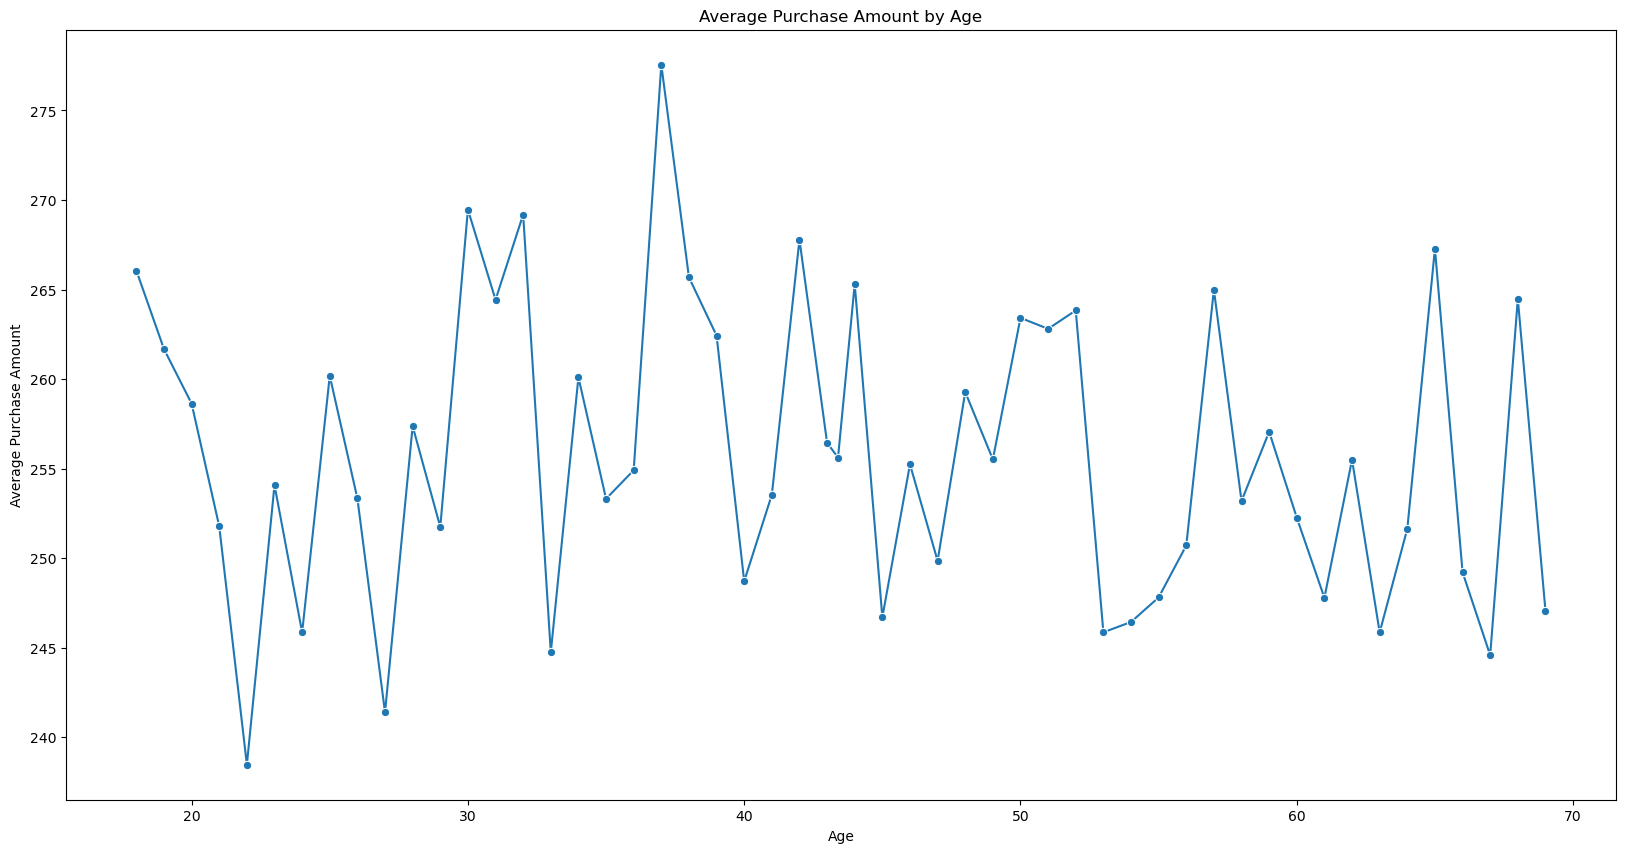

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# nhóm dữ liệu theo độ tuổi và tính trung bình hoặc tổng chi tiêu
age_purchase = df_shopping.groupby('Age')['Purchase Amount'].mean()  # thay = .sum() để lấy tổng 

# chuyển đổi thành DataFrame để dễ trực quan hóa
age_purchase = age_purchase.reset_index()

# vẽ biểu đồ đường để thể hiện mối quan hệ giữa tuổi và chi tiêu trung bình
plt.figure(figsize=(20, 10))
sns.lineplot(data=age_purchase, x='Age', y='Purchase Amount', marker='o')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.show()



- Không có xu hướng rõ ràng theo tuổi: Các nhóm tuổi khác nhau chi tiêu không đồng đều.

- Những độ tuổi có mức chi tiêu cao: độ tuổi gần 20, 30 và khoảng gần 40 và trên 50,...

- Những độ tuổi chi tiêu thấp: Một số độ tuổi như gần 30 và khoảng trên 60 có mức chi tiêu trung bình thấp hơn so với các độ tuổi khác.

### Biểu đồ 2: Age x Product Category - Thống kê sở thích người dùng theo độ tuổi

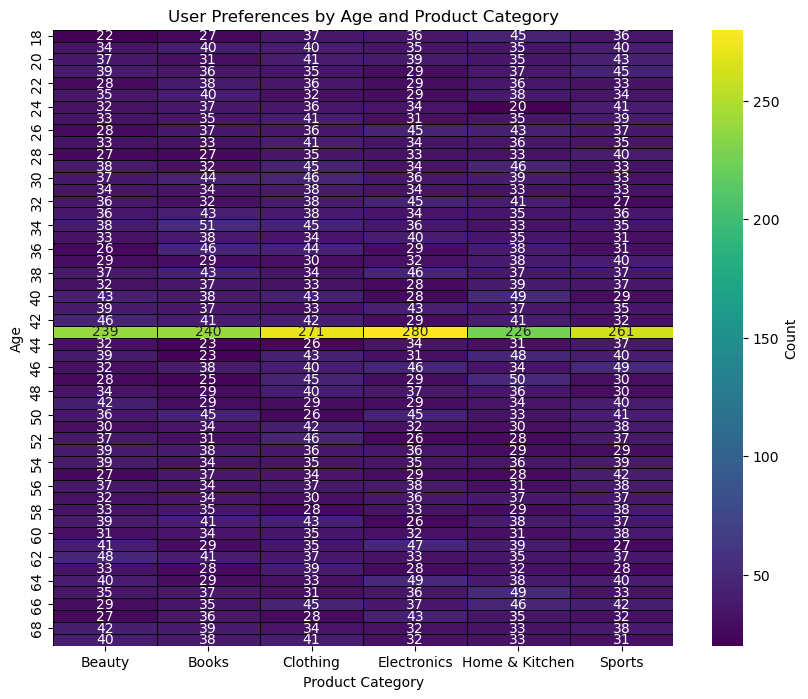

In [73]:
# chuyển độ tuổi sang kiểu int cho dễ nhìn
df_shopping['Age'] = df_shopping['Age'].astype(int)
# nhóm dữ liệu theo Age và Product Category để đếm số lượng
age_category_counts = df_shopping.groupby(['Age', 'Product Category']).size().unstack(fill_value=0)

# vẽ biểu đồ heatmap sẽ hiển thị số lượng sản phẩm của mỗi danh mục theo độ tuổi
plt.figure(figsize=(10, 8))
sns.heatmap(age_category_counts, cmap='viridis', linewidths=0.5, linecolor="black",  annot=True, fmt="d", cbar_kws={'label': 'Count'})
plt.title('User Preferences by Age and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.show()


- Độ tuổi chi tiêu nhiều nhất: Độ tuổi khoảng 43-44 có số lượng mua hàng cao nhất trong tất cả các danh mục sản phẩm.

- Danh mục sản phẩm phổ biến:

  - Clothing (Quần áo) và Electronics (Điện tử) là hai danh mục có số lượng mua cao nhất ở nhiều nhóm tuổi, đặc biệt là từ độ tuổi 20 đến 50.
  - Beauty (Sản phẩm làm đẹp) và Home & Kitchen (Đồ gia dụng & Nhà bếp) có lượng mua tương đối ổn định ở nhiều độ tuổi, nhưng không nổi bật bằng Clothing và Electronics.
  - Sports (Thể thao) có mức độ mua sắm thấp hơn so với các danh mục khác.

- Xu hướng theo độ tuổi:

  - Nhóm tuổi từ 20 đến 50 có số lượng mua hàng cao hơn trong hầu hết các danh mục so với nhóm trên 50 tuổi.
  - Nhóm tuổi trên 50 có xu hướng giảm dần số lượng mua sắm, đặc biệt là trong các danh mục như Electronics và Sports.

- Màu sắc Heatmap:

  - Các ô có màu sắc sáng hơn (xanh lá và vàng) cho thấy số lượng mua sắm cao, chủ yếu tập trung ở độ tuổi từ 20 đến 50.
  - Các ô tối màu cho thấy số lượng mua sắm thấp hơn, đặc biệt ở độ tuổi từ 60 trở lên, nơi mà người dùng ít mua sắm hơn trong các danh mục sản phẩm.
  
**Độ tuổi từ 20 đến 50 có nhu cầu mua sắm cao nhất, đặc biệt với các sản phẩm Clothing và Electronics. Nhóm tuổi trên 50 có xu hướng mua sắm ít hơn.**

### Biểu đồ 3: Gender x Purchase Amount - Thống kê số tiền người dùng chi tiêu theo độ tuổi

C:\Users\vieta\AppData\Local\Temp\ipykernel_12488\3121385884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_shopping, x='Gender', y='Purchase Amount', palette='Set2')


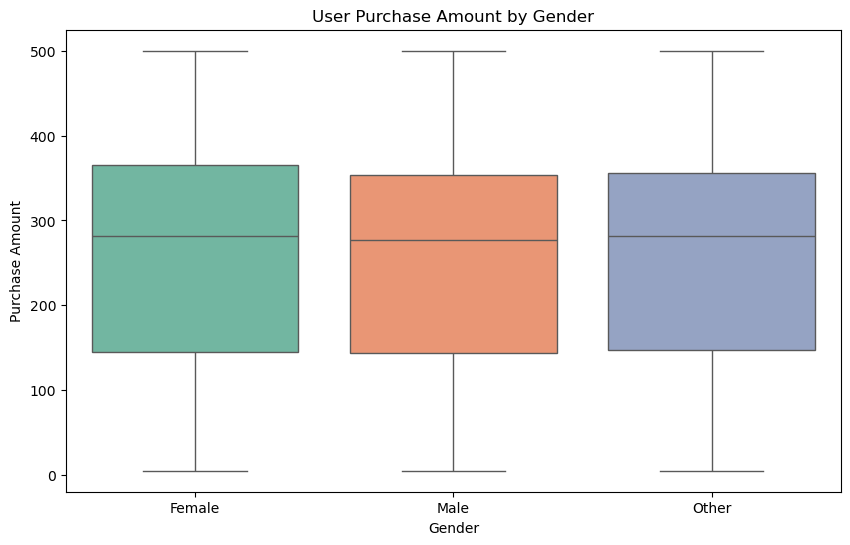

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# vẽ biểu đồ Box Plot cho thấy phân phối chi tiêu của từng giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_shopping, x='Gender', y='Purchase Amount', palette='Set2')
plt.title('User Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


- Mức chi tiêu trung bình:
 - Biểu đồ cho thấy các giới tính có mức chi tiêu trung bình khá tương đồng, với đường trung vị ở khoảng 250 - 300.
 
- Phạm vi chi tiêu:
 - Cả ba giới tính đều có phạm vi chi tiêu tương đối rộng, từ mức thấp gần 0 đến khoảng 500.
 - Khoảng biến thiên của chi tiêu khá lớn, cho thấy sự đa dạng trong mức chi tiêu của từng giới tính.
 
- Sự phân tán:
 - Các hộp (box) cho thấy độ phân tán của dữ liệu giữa các giới tính là khá đồng đều. Phần lớn dữ liệu tập trung trong khoảng từ 150 đến khoảng 400 cho tất cả giới tính.
 - dữ liệu không có nhiều giá trị ngoại lệ trong mức chi tiêu của các giới tính.

- So sánh giữa các giới tính:

 - Các giới tính đều có mức chi tiêu trung bình và phạm vi chi tiêu tương tự nhau.
 
**mức chi tiêu của người dùng không bị ảnh hưởng nhiều bởi yếu tố giới tính.**

### Biểu đồ 4: Gender x Product Category - Thống kê sở thích danh mục theo giới tính 

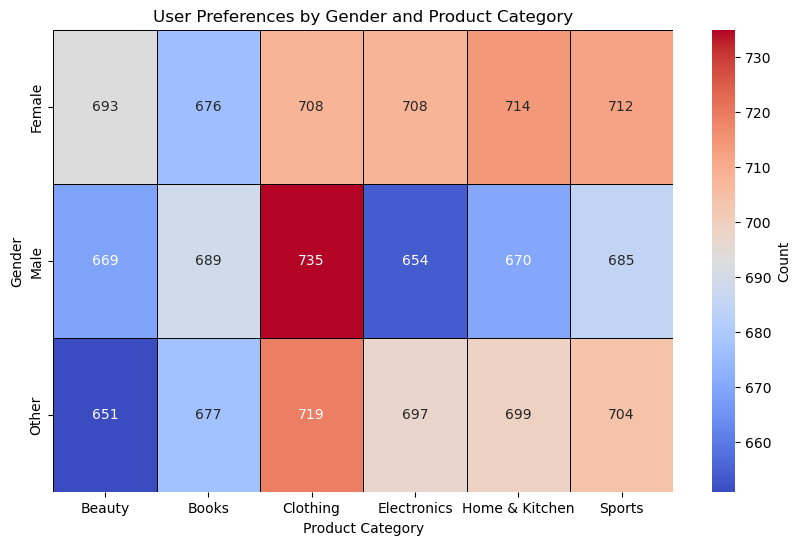

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tạo bảng thống kê số lượng sản phẩm theo giới tính và danh mục
category_gender_count = df_shopping.pivot_table(index='Gender', columns='Product Category', aggfunc='size', fill_value=0)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(category_gender_count, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', fmt="d", cbar_kws={'label': 'Count'})
plt.title('User Preferences by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()


- Clothing là danh mục có sức hút lớn nhất, đặc biệt với nhóm Male.
- Beauty thu hút nhóm Female, Electronics thu hút nhóm Female và Other.
- Các danh mục Books, Home & Kitchen, và Sports có mức độ yêu thích khá đồng đều giữa các giới tính.

Country x Purchase Amount - Thống kê số tiền người dùng chi tiêu theo thành phố

Country x Product Category - Thống kê danh mục sở thích của các khu cực thành phố

---

### Biểu đồ : Purchase Amount x Purchase Date -  Thống kê chi tiêu theo ngày

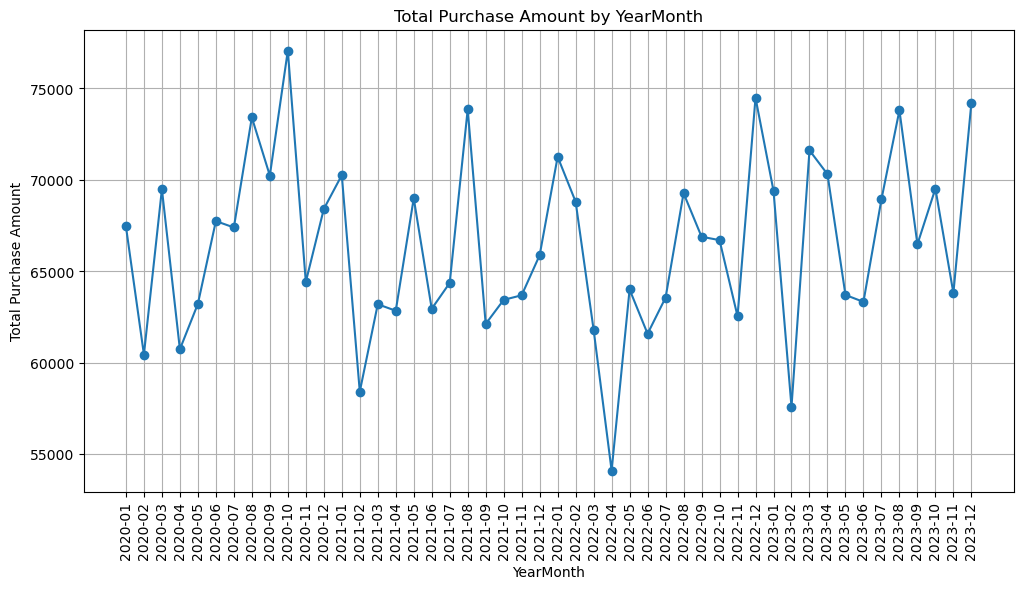

In [76]:
#Chuyển định dạng
df_shopping['YearMonth'] = df_shopping['Purchase Date'].dt.strftime('%Y-%m')

#Vẽ biểu đồ đường thể hiện số tiền bỏ ra để mua sản phẩm theo YearMonth
amount_date =  df_shopping.groupby('YearMonth')['Purchase Amount'].sum()
plt.figure(figsize=(12,6))
plt.plot(amount_date.index, amount_date.values, marker='o')
plt.title('Total Purchase Amount by YearMonth')
plt.ylabel('Total Purchase Amount')
plt.xlabel('YearMonth')
plt.xticks(rotation=90)
plt.grid()

Nhận xét: 
+ Vào khoảng thời gian tháng Hai đến tháng Tư hàng năm thì chi tiêu mua hàng giảm mạnh
+ Vào khoảng thời gian cuối năm thì nhu cầu mua sắm tăng

### Biểu đồ : Product Category x Purchase Amount x Gender - Thống kê danh mục chi tiêu theo giới tính - Biểu đồ cột

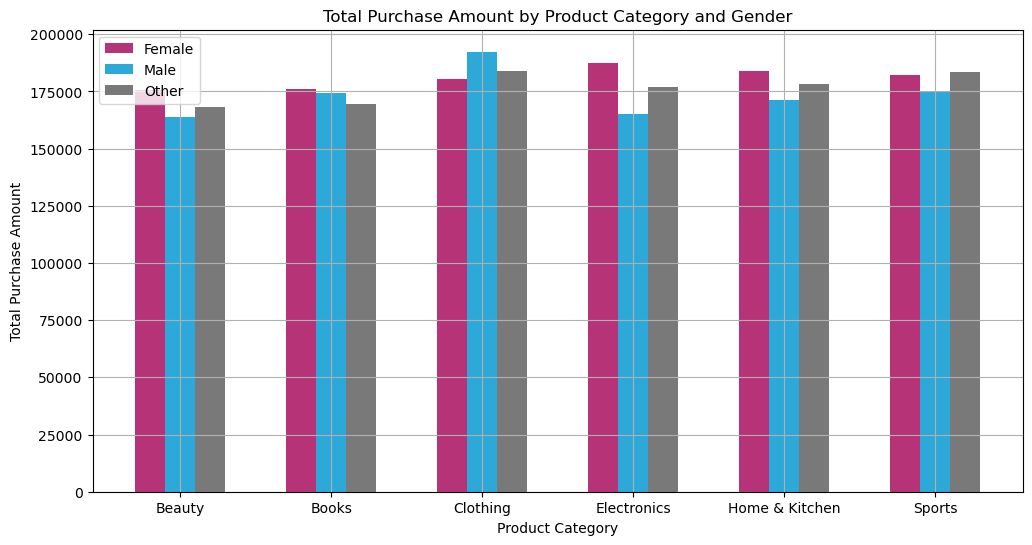

In [77]:
#Vẽ biểu đồ cột thể hiện chi tiêu sản phẩm theo Product Category và Gender
df_amount_category_gender = df_shopping.groupby(['Product Category','Gender'])['Purchase Amount'].sum().unstack()
df_amount_category_gender

x = np.arange(len(df_amount_category_gender.index))

Female = df_amount_category_gender["Female"]
Male = df_amount_category_gender["Male"]
Other = df_amount_category_gender["Other"]

plt.figure(figsize=(12,6))
plt.bar(x - 0.2, Female, width=0.2, label="Female", color='#b73377')
plt.bar(x,       Male,   width=0.2, label="Male", color='#2da9d9')
plt.bar(x + 0.2, Other,  width=0.2, label="Other", color='#797979')


plt.title('Total Purchase Amount by Product Category and Gender')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Product Category')
plt.xticks(x, df_amount_category_gender.index)
plt.grid()
plt.legend()



Nhận xét:
+ Ngành hàng Quần áo được tất cả các giới tính mua nhiều nhất
+ Giới tính Male chi nhiều tiền nhất cho Clothing và ít nhất cho Beauty và Electronics
+ Giới tính Female chi nhiều tiền nhất cho Electronics, Home & Kitchen và Sports

### Biểu đồ : Purchase Date x Product Category x Purchase Amount - Thống kê danh mục sở thích theo thời gian - Biểu đồ đường

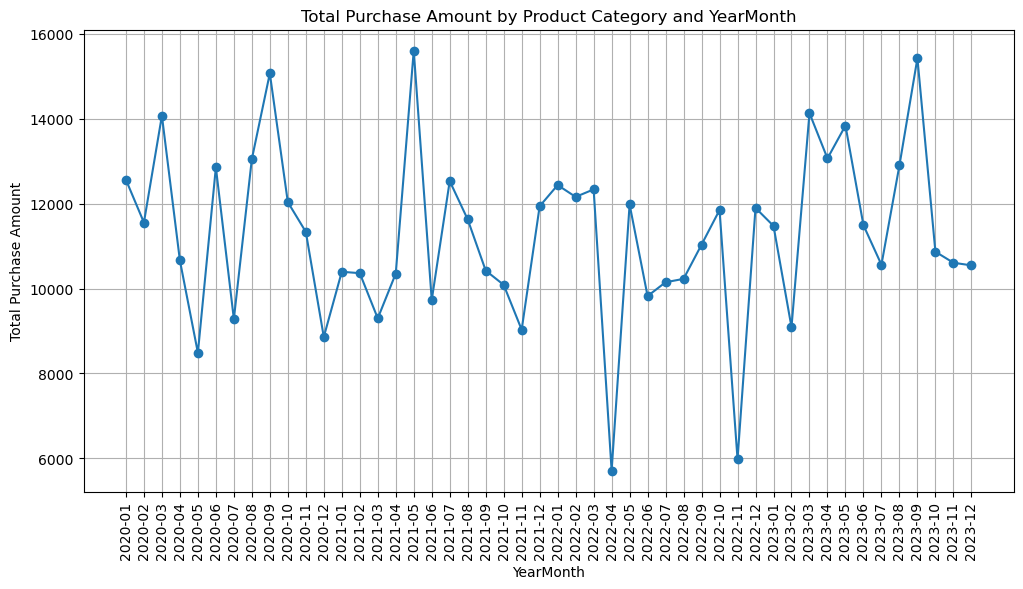

In [79]:
#Vẽ biểu đồ đường thể hiện số tiền bỏ ra để mua sản phẩm theo theo Product Category và Purchase Date
df_amount_category_date = df_shopping.groupby(['YearMonth','Product Category'])['Purchase Amount'].sum().unstack()
df_amount_category_date

Sports = df_amount_category_date["Sports"]
Electronics = df_amount_category_date["Electronics"]
Clothing = df_amount_category_date["Clothing"]
Home_Kitchen = df_amount_category_date["Home & Kitchen"]
Beauty = df_amount_category_date["Beauty"]
Books = df_amount_category_date["Books"]

plt.figure(figsize=(12,6))
plt.plot(Sports.index, Sports.values, marker='o', label='Sports')
# plt.plot(Electronics.index, Electronics.values, marker='o', label='Electronics')
# plt.plot(Clothing.index, Clothing.values, marker='o', label='Clothing')
# plt.plot(Home_Kitchen.index, Home_Kitchen.values, marker='o', label='Home & Kitchen')
# plt.plot(Beauty.index, Beauty.values, marker='o', label='Beauty')
# plt.plot(Books.index, Books.values, marker='o', label='Books')


plt.title('Total Purchase Amount by Product Category and YearMonth')
plt.ylabel('Total Purchase Amount')
plt.xlabel('YearMonth')
plt.xticks(rotation=90)
plt.grid()
